The following cells provide an example workflow for a typical pythin script. We need to specify the libraries that we'll use--knowing which libraries you need is a matter of experience (and using Google...). Then we define a custom function. This is useful if we want to use the same computation over and over again, or to whorten up the code. Finally, we go through the steps of loading some data from a text file and then plotting that data. 

There's a lot of information contained in this example. There are lots of comments (denoted with a `#`) the will help you understand what's happening. In general, you'll need to take these examples and modify them for the assignment. The best way to do this is to copy the code cell by cell (or even line by line) from here into your assignment. This way you can slowly learn what each line does as well as make sure that your changes work as you go along. It's easier to fix one thing and then move or rather than having sixteen things to fix all at once.

In [7]:
# Import the packages we want to use
import matplotlib.pyplot as plt    # basic plotting functions
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd                # dataframes (sort of like a python spreadsheet)
import numpy as np                 # math functions (e.g. sin(), cos())



In [8]:
# This cell block defines a function that will calculate the distance between two points
# Note that it only works over short distances--up to a few tens of kilometers. 
# Beyond that the distance returned will be underestimated. 
# You can copy and paste this function into your notebooks anywhere that you need to estimate distances
# 
# This function requires numpy to be imported as np
# import numpy as np

def distance_in_km(lat1, lon1, lat2, lon2):
    R = 6371; # Radius of the Earth in km

    phi = (lat1 + lat2)*0.5; # The average latitude
    dphi = lat2 - lat1;    # Change in latitude
    dtheta = lon2 - lon1;  # Change in longitude

    # Distance between two points on the Earth
    # Result is in km because radius of Earth is specified in km
    dy = R*np.sin(dphi/180*np.pi);                         # Change in y direction
    dx = R*np.cos(phi/180*np.pi)*np.sin(dtheta/180*np.pi); # Change in x direciton
    dist_in_km = np.sqrt(dx*dx + dy*dy)                    # Via pythagorean theorem
                  
    return dist_in_km


In [9]:
# As an example/test, call the previous function to figure out the distance from 
# Ellison Hall, at 34.41593ºN, -119.84523ºE
# to
# Study Hall, at 34.41303, -119.85564ºE
distance_in_km(34.41593, -119.84523, 34.41303, -119.85564)

1.0079119157963874

In [12]:
# Next, we load our data. This step uses "pandas" (which we renamed to "pd", above)
# I have provided an example data file. You will need to create, properly format, and upload your own file. 

# Read a file containing the measurements
df = pd.read_csv('../Data/example_data.csv', sep=',', header=[0], na_values='NaN')  

# We now have a dataframe called "df". 
# df contains fields that correspond to the columns of our CSV file. 

# We can display this data frame by simply typing its name with nothing else
df

,station,lat,lon,surf_DO,bot_DO,surf_temp,bot_temp
0,CL1,34.40837,-119.84406,5.68,4.20,20.1,19.9
1,CL2,34.41100,-119.84850,5.48,2.98,21.7,21.5


In [13]:
# Next, we'll compute distance along the channel, 
# relative to the location of the first sample. 
# (This assumes that the samples are listed sequentially 
# from one end of the lagoon to the other.)


# Create a new "column" or series in the dataframe, to store our calculations
df['dist_bw_stations'] = 0.0
df['total_distance'] = 0.0

# Loop through the data points
# Note that we skip the first location (where the index equals 0)
for n in range(1, len(df.index)):

    # Distance between two points on the Earth, using the function defined above
    dist_in_km = distance_in_km(df.lat[n-1], df.lon[n-1], df.lat[n], df.lon[n]) 

    # PUT THE RESULTS OF THE CALCULATION into the dataframe
    # this line says: put the value stored as "dist_in_km" into [row, column]
    df.at[n,'dist_bw_stations'] = dist_in_km
    df.at[n,'total_distance'] = df.total_distance[n-1] + dist_in_km

# Inspect the dataframe to see the new columns
df

,station,lat,lon,surf_DO,bot_DO,surf_temp,bot_temp,dist_bw_stations,total_distance
0,CL1,34.40837,-119.84406,5.68,4.20,20.1,19.9,0.000000,0.000000
1,CL2,34.41100,-119.84850,5.48,2.98,21.7,21.5,0.501427,0.501427


In [16]:
# Load a set of shoreline points. When plotted as a line, these show campus lagoon and the nearby coastline.
df_shoreline = pd.read_csv('../Data/shoreline.csv', sep=',', header=[0], na_values='NaN')  

# Also load a list of the storm drains you found along the lagoon.
df_drains = pd.read_csv('../Data/storm_drains.csv', sep=',', header=[0], na_values='NaN')  

At this point we have everything that we need to make some plots. Three plotting examples follow.

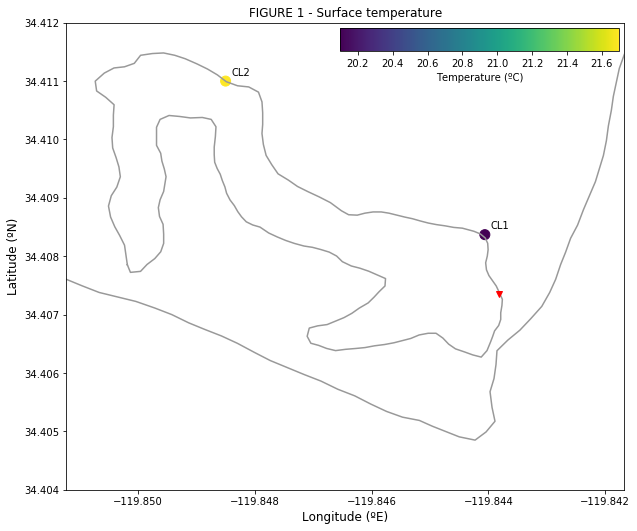

In [17]:
# FIGURE 1. Example of a color-coded scatter plot, overlaid on the shoreline points.
# Storm drain locations are shown with the plot function, but without a line type specified.

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)


# Plot surface temperature as a scatter plot on the map. 
# scatter(X, Y, SIZE, COLOR)
pts = plt.scatter(
        df.lon, 
        df.lat,
        100,df.surf_temp)

# Annotate the points with the station names
for n, txt in enumerate(df.station):
    ax.annotate(txt, (df.lon[n]+0.0001, df.lat[n]+0.0001))


# Shoreline points
ax.plot(df_shoreline.longitude, df_shoreline.latitude, 
        '-', color=('0.6')) # solid gray line, no symbol
# See https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html for more colors/options...

# storm drains
ax.plot(df_drains.longitude, df_drains.latitude, 'rv') # Red triangle, no line

   
# Set the axis limits, format the tick marks
ax.set_aspect('equal', 'box')
ax.set(xlim=(df_shoreline.longitude.min(), df_shoreline.longitude.max()), 
       ylim=(34.404, 34.412))
ax.ticklabel_format(useOffset=False)  # This keep the longitude numbers looking normal...
    
# Add some labels
ax.set_ylabel("Latitude (ºN)", fontsize=12)   # Set the y axis label
ax.set_xlabel("Longitude (ºE)", fontsize=12)  # x axis label
ax.set_title("FIGURE 1 - Surface temperature", fontsize=12)    # TITLE

# Add a colorbar
axins = inset_axes(ax, width="50%", height="5%", loc='upper right')
fig.colorbar(pts, cax=axins, orientation="horizontal", label="Temperature (ºC)")




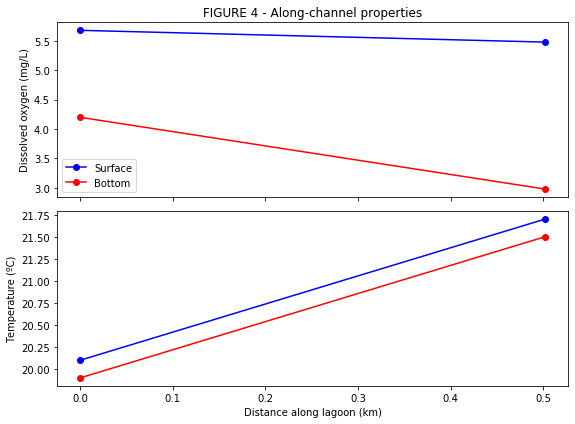

In [18]:
# FIGURE 2. Example of a plot of data along the axis of the estuary using distance. This shows two subplots.

# Set up a figure with a set of axes "ax"
# Create figure and specify subplot orientation (2 rows, 1 column), shared x-axis, and figure size
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8,6)) 


# Plot the surface data into the first subplot
ax1.plot(df.total_distance,
        df.surf_DO,
        'b-o',
        label="Surface")   

# Plot the bottom data into the first subplot. Use a different color
ax1.plot(df.total_distance,
        df.bot_DO,
        'r-o',
        label="Bottom")   

# Add some labels and a legend
# Note that we only want to set the xlabel on the last plot in the set of subpanels
# We can also get away with using a single legend, because all of the plots have the 
# show similar information
ax1.set_ylabel("Dissolved oxygen (mg/L)");   # Set the y axis label
ax1.legend()
ax1.set_title("FIGURE 4 - Along-channel properties")


# REPEAT with the TEMPERATURE Data
ax2.plot(df.total_distance,
        df.surf_temp,
        'b-o',
        label="Surface")   

ax2.plot(df.total_distance,
        df.bot_temp,
        'r-o',
        label="Bottom")   

ax2.set_ylabel("Temperature (ºC)");   # Set the y axis label
ax2.set_xlabel("Distance along lagoon (km)");  # x axis label

fig.tight_layout()

In [19]:
# The following code will grab weather data from the Santa Barbara Airport
# for the time period specified within the "start" and "end" points.
# The timestamp is referenced to UTC. Temperature is in ºC. 
#https://developers.synopticdata.com/mesonet/v2/stations/timeseries/
from datetime import datetime    
import requests       # For grabbing data via API
import json           # For parsing strings in json format
import pandas as pd   # For managing data

parameters = {'token': 'f0c7febd7f634e09a2de8b3a16119db6', 
              'stid':'ksba',
              'start':'201910100000', 
              'end':'201910240000',
              'obtimezone':'local', 
              'vars':'wind_speed,air_temp',
              'output':'json'}
response = requests.get('https://api.synopticdata.com/v2/stations/timeseries',
             params=parameters)
data = response.json()  # parse out json structure

df_ksba = pd.DataFrame() # Create empty dataframe
df_ksba['timestamp'] = datetime.now() # Initialize timestamp field (or column)

obs_time = data['STATION'][0]['OBSERVATIONS']['date_time']
# Loop through each line and convert the string into a "datetime" value
for n in range(0, len(obs_time)):
    df_ksba.at[n,'timestamp'] = datetime.strptime(obs_time[n][0:-5], "%Y-%m-%dT%H:%M:%S")

# Add the data from the wind speed and the air temperature
df_ksba['windspd'] = data['STATION'][0]['OBSERVATIONS']['wind_speed_set_1']
df_ksba['airtemp'] = data['STATION'][0]['OBSERVATIONS']['air_temp_set_1']

# Check out the table we made
df_ksba

,timestamp,windspd,airtemp
0,2019-10-09 17:00:00,3.09,18.0
1,2019-10-09 17:05:00,3.09,18.0
2,2019-10-09 17:10:00,2.57,19.0
3,2019-10-09 17:15:00,3.09,18.0
4,2019-10-09 17:20:00,3.60,18.0
...,...,...,...
4365,2019-10-23 16:45:00,1.54,27.0
4366,2019-10-23 16:50:00,1.54,27.0
4367,2019-10-23 16:53:00,1.54,27.2
4368,2019-10-23 16:55:00,2.57,27.0


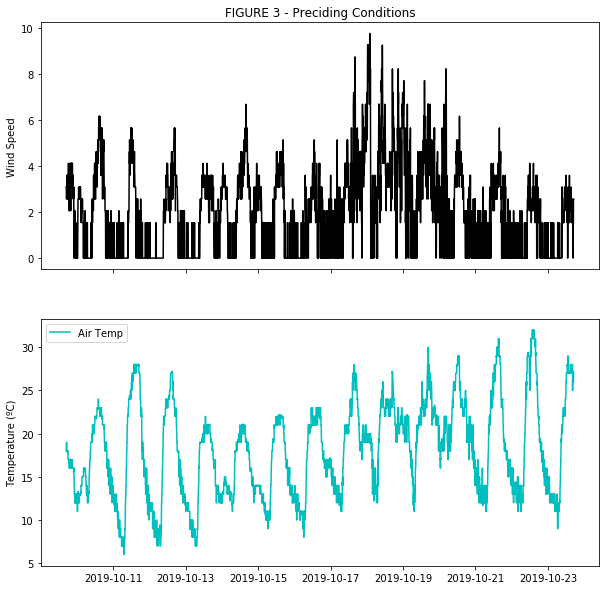

In [21]:
# Now we'll make a plot with two sub panles that shows the wind speed in one and the air temp in the other

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,10)) 

ax1.plot(df_ksba.timestamp,
         df_ksba.windspd,
        'k',
        label="Wind Speed")     
ax1.set_ylabel("Wind Speed");   
ax1.set_title("FIGURE 3 - Preciding Conditions")


ax2.plot(df_ksba.timestamp,
         df_ksba.airtemp,
        'c-',
        label="Air Temp")   

ax2.set_ylabel("Temperature (ºC)");   
ax2.legend()

